# Imports

In [1]:
# imports

# data packages
import numpy as np
import pandas as pd

# visualization packages
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

# Data

In [2]:
# read MLB payroll dataset
df = pd.read_csv('MLB Payroll.csv')

# start index at '1'
df.index = np.arange(1, len(df) + 1)

# display dataframe
df.head()

,Season,Team,League,Division,Payroll,Win_Percent
1,2022,Arizona Diamondbacks,National,West,"75,993,000",0.457
2,2022,Atlanta Braves,National,East,"173,935,000",0.623
3,2022,Baltimore Orioles,American,East,"30,221,000",0.512
4,2022,Boston Red Sox,American,East,"195,166,000",0.481
5,2022,Chicago Cubs,National,Central,"130,560,000",0.457


In [3]:
# display dataframe datatypes
df.dtypes

Season           int64
Team            object
League          object
Division        object
Payroll         object
Win_Percent    float64
dtype: object

In [4]:
# remove commas from payroll values and set coulumn as integer
df['Payroll'] = df['Payroll'].str.replace(',', '').astype(int)

In [5]:
# round 'Payroll' values to the nearest milliion
df['Payroll'] = np.round(df['Payroll'], -6)

In [6]:
# add baseball image to dataframe
df['baseball_img'] = 'http://localhost:8888/files/DataVizNotebooks/final%20project/baseball.png'

In [7]:
df.head()

,Season,Team,League,Division,Payroll,Win_Percent,baseball_img
1,2022,Arizona Diamondbacks,National,West,76000000,0.457,http://localhost:8888/files/DataVizNotebooks/f...
2,2022,Atlanta Braves,National,East,174000000,0.623,http://localhost:8888/files/DataVizNotebooks/f...
3,2022,Baltimore Orioles,American,East,30000000,0.512,http://localhost:8888/files/DataVizNotebooks/f...
4,2022,Boston Red Sox,American,East,195000000,0.481,http://localhost:8888/files/DataVizNotebooks/f...
5,2022,Chicago Cubs,National,Central,131000000,0.457,http://localhost:8888/files/DataVizNotebooks/f...


In [8]:
# American League teams
al_df = df[df['League'] == 'American']

# National League teams
nl_df = df[df['League'] == 'National']

# Experiments

## Seaborn

### Kernel density estimate

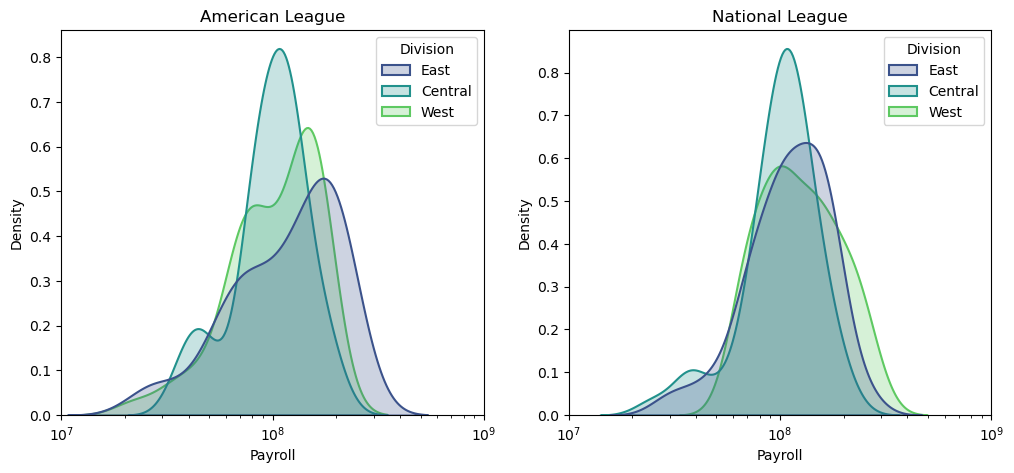

In [9]:
from matplotlib.ticker import FormatStrFormatter

fig, axes = plt.subplots(1, 2, figsize=(12, 5))


for i, league in enumerate([al_df, nl_df]):
    sns.kdeplot(data=league, x='Payroll', hue='Division', hue_order=['East', 'Central', 'West'],
                fill=True, log_scale=True,
                linewidth=1.5, ax=axes[i], palette='viridis')

    axes[i].set_title(league['League'].unique()[0] + " League")
    axes[i].set_xlim(10e6, 10e8)
    axes[i].xaxis.set_minor_locator(matplotlib.ticker.LogLocator(base=10.0, subs='all'))

In [10]:
# Standard deviation payroll versus standard deviation win percentage
# avgerage payroll versus standard deviation win percentage
season_sd = df.groupby('Season')['Payroll', 'Win_Percent'].std()
season_sd

/var/folders/01/6mr1bxrs1yv1kpw_97dzxy4h0000gn/T/ipykernel_12755/1473477161.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  season_sd = df.groupby('Season')['Payroll', 'Win_Percent'].std()


,Payroll,Win_Percent
Season,,
2013,4.629511e+07,0.075487
2014,4.343769e+07,0.059297
2015,4.537045e+07,0.064409
2016,4.016719e+07,0.066177
2017,4.502291e+07,0.071229
2018,4.152518e+07,0.090368
2019,4.288536e+07,0.097960
2020,2.228512e+07,0.092986
2021,5.141458e+07,0.089258


Text(0.5, 1.0, 'Standard Deviation of Winning %')

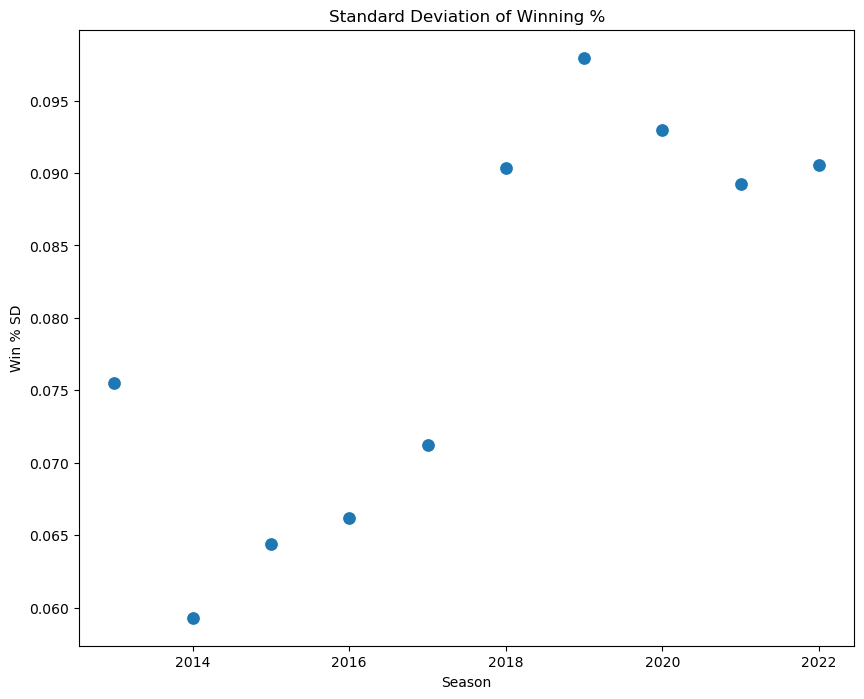

In [11]:
figure = plt.figure(figsize=(10, 8))
sns.scatterplot(data=season_sd, x='Season', y='Win_Percent', s=100)
plt.ylabel('Win % SD')
plt.title('Standard Deviation of Winning %')

Text(0.5, 1.0, 'Standard Deviation of Payroll')

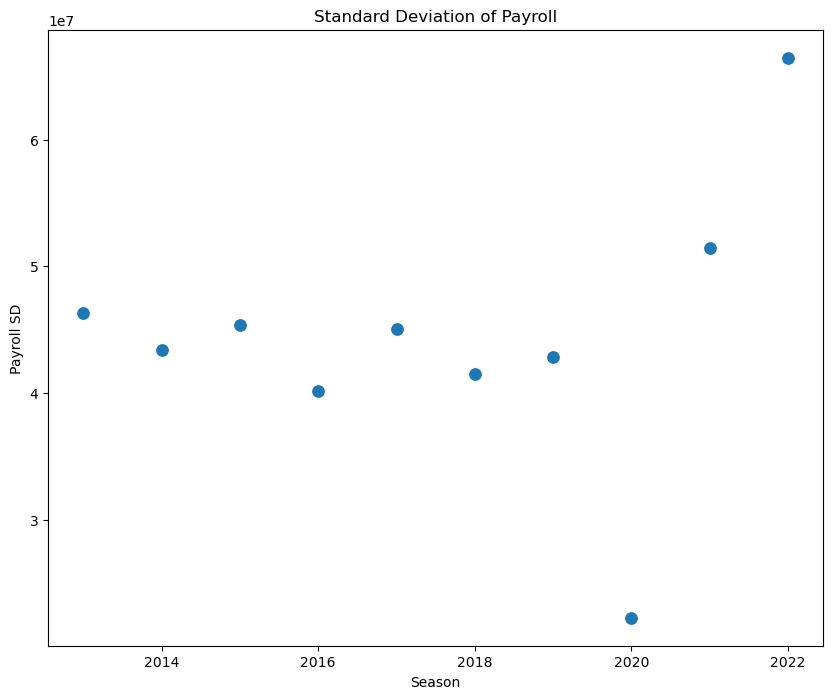

In [12]:
figure = plt.figure(figsize=(10, 8))
sns.scatterplot(data=season_sd, x='Season', y='Payroll', s=100)
plt.ylabel('Payroll SD')
plt.title('Standard Deviation of Payroll')

Text(0.5, 1.0, 'Standard Deviation of Payroll vs Standard Deviation of Winning %')

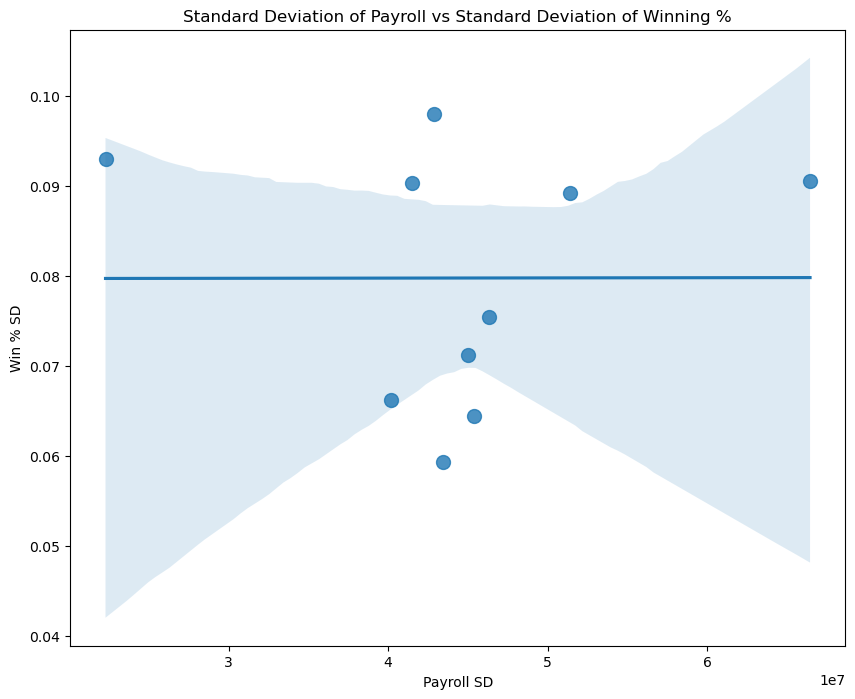

In [13]:
figure = plt.figure(figsize=(10, 8))
sns.regplot(data=season_sd, x='Payroll', y='Win_Percent', scatter_kws={'s':100})
plt.xlabel('Payroll SD')
plt.ylabel('Win % SD')
plt.title('Standard Deviation of Payroll vs Standard Deviation of Winning %')

#### There seems to be no correlation between the standard deviation of payroll and the standard deviation of winning percentage. Additionally, the variation of winning percentages has been increasing in recent years, while the deviation in payrolls has increased in the last couple years after the Covid-19 pandemic.

### Regresson plots by season

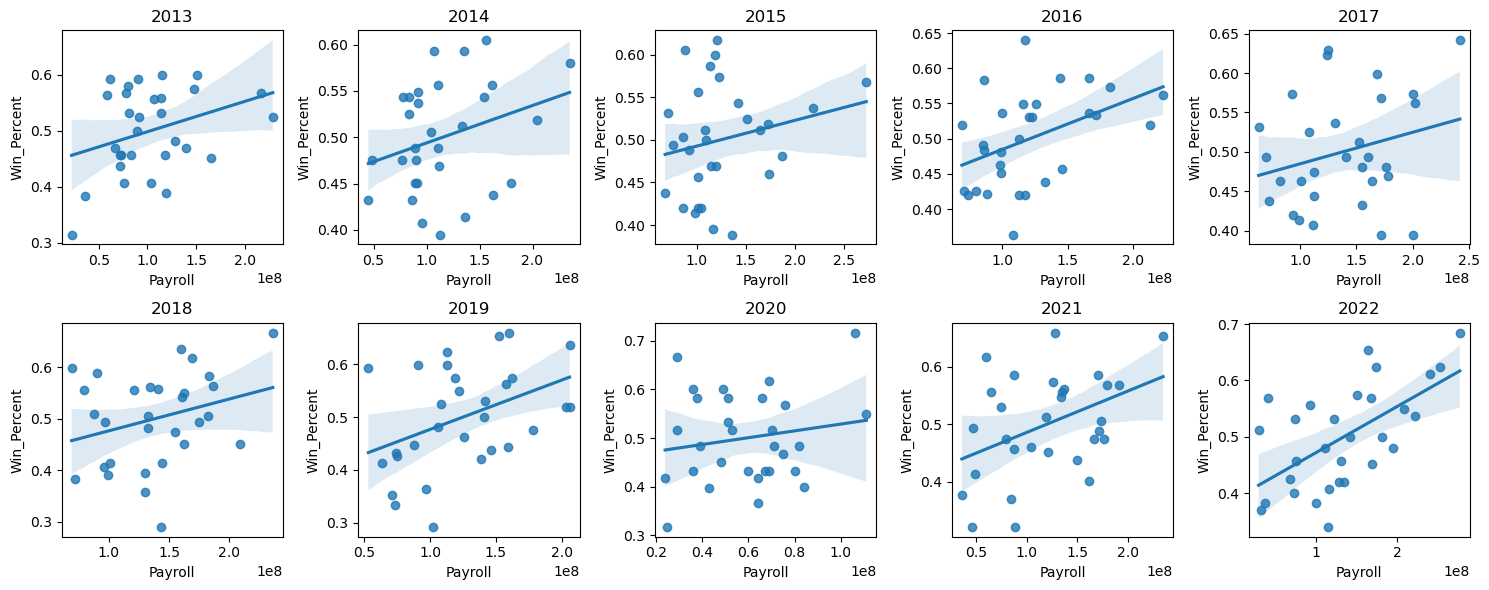

In [14]:
# get minimum and maximum season years from dataset
min_season = min(df['Season'].unique())
max_season = max(df['Season'].unique())

# set plot size
# plt.figure(figsize=(15, 20))
plt.figure(figsize=(15, 6))

# Iterate dataset seasons
for i, season in enumerate(range(min_season, max_season + 1)):
    df_season = df[df['Season'] == season]

    # plt.subplot(4, 3, i + 1)
    plt.subplot(2, 5, i + 1)
    sns.regplot(data=df_season, x='Payroll', y='Win_Percent')
    plt.title(season)

plt.tight_layout()

### Strip plot

Text(0.5, 1.0, 'Win Percent vs Payroll')

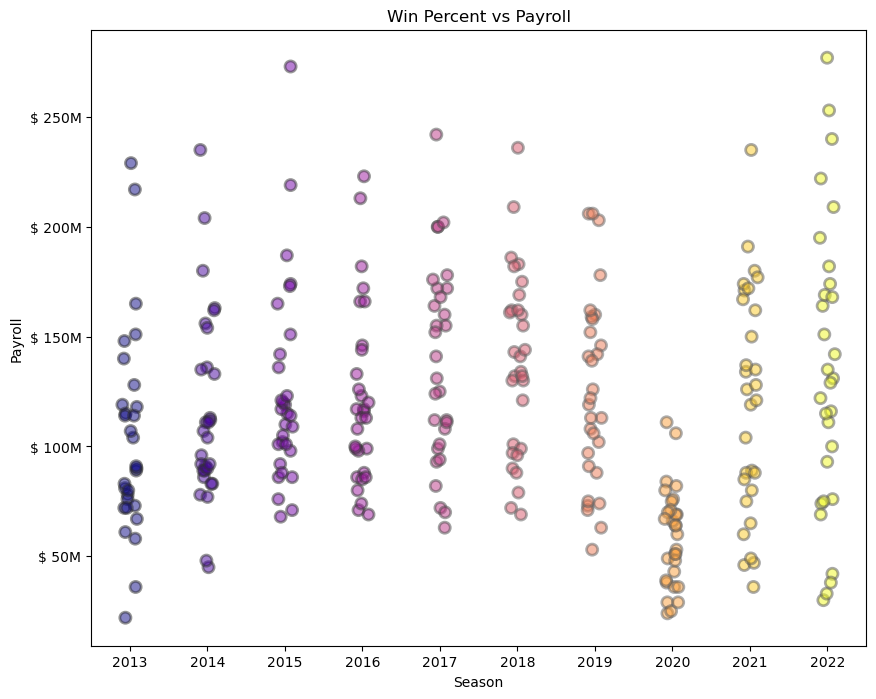

In [15]:
figure = plt.figure(figsize=(10, 8))

# plot the season payrolls
ax = sns.stripplot(data=df, x='Season', y='Payroll', hue='Season', s=8, legend=False,
                   palette='plasma', alpha=0.5, linewidth=2)

# format the y-axis to display as readable millions
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: f'${x/1000000: .0f}M'))
plt.title("Win Percent vs Payroll")

## Altair

In [16]:
scatter = alt.Chart(df).mark_circle(size=50).encode(
    # x='Payroll',
    x=alt.X('Payroll',
            axis=alt.Axis(format='~s')),
    y=alt.Y('Win_Percent',
            title="Win Percent",
            scale=alt.Scale(zero=False)),
    tooltip=['Season', 'Team', 'League', 'Division', 'Payroll', 'Win_Percent']
).properties(
    title="Win Percent vs Payroll",
    width=800,
    height=600
).interactive()

scatter + scatter.transform_regression('Payroll', 'Win_Percent').mark_line()

alt.LayerChart(...)

#### plot varibales

In [17]:
# variables for the min/max x-axis domain
min_season = min(df['Season'])
max_season = max(df['Season'])

In [18]:
# Function to set payroll min/max for y-axis domain
def min_max_payrolls(league=None):
    # check which league to use
    if league == 'American':
        payroll_col = al_df['Payroll']
    elif league == 'National':
        payroll_col = nl_df['Payroll']
    elif league == None:
         payroll_col = df['Payroll']

    # set min/max values from designated dataframe
    try:
        min_payroll = np.round(min(payroll_col), -6) - 10000000
        max_payroll = np.round(max(payroll_col), -6) + 10000000

        # return min/max payroll values
        return min_payroll, max_payroll

    # throw exception
    except UnboundLocalError:
        print("Oops! Invalid league name.")

In [19]:
min_payroll, max_payroll = min_max_payrolls()

### Strip plot (interactive)

In [20]:
alt.Chart(df).mark_circle(size=100).encode(
    x=alt.X('Season:N',
            axis=alt.Axis(
                ticks=True,
                grid=False,
                labels=True,
                tickCount=10,
                format='C'),
           ),
    y=alt.Y('Payroll:Q',
            axis=alt.Axis(format='~s'),
            scale=alt.Scale(domainMin=min_payroll, domainMax=max_payroll)
           ),
    color=alt.condition(alt.datum.Win_Percent < 0.5, alt.value('blue'), alt.value('orange')),
    tooltip=['Season', 'Team', alt.Tooltip('Payroll', format='~s'), alt.Tooltip('Win_Percent', title='Win %')]
).configure_mark(
    opacity=0.6
).configure_title(
    fontSize=20
).configure_axisX(
    titleFontSize=20,
    labelFontSize=12,
    labelAngle=0,
).configure_axisY(
    titleFontSize=20,
    labelFontSize=12
).properties(
    title="MLB Payroll vs Win Percent",
    width=800,
    height=600
).interactive()

alt.Chart(...)

### Box plot

In [21]:
# Payroll boxplot chart
payroll_boxplot = alt.Chart(df).mark_boxplot(size=50, opacity=0.75,
                                             extent='min-max', median={'color': 'red'}).encode(
    alt.X('Season:N'),
    y=alt.Y('Payroll:Q',
            scale=alt.Scale(zero=False),
            axis=alt.Axis(format='~s')),
    color=alt.Color('Season:N').legend(None)
)

# Boxplot mean circle mark
boxplot_mark = alt.Chart(df).mark_circle(color='yellow', size=100).encode(
    x='Season:N',
    y='mean(Payroll)'
)

# Aggregate data for boxplot
boxplot_transform = alt.Chart(df).transform_aggregate(
    min="min(Payroll)",
    max="max(Payroll)",
    mean="mean(Payroll)",
    median="median(Payroll)",
    q1="q1(Payroll)",
    q3="q3(Payroll)",
    groupby=['Season']
).mark_bar(opacity=0).encode(
    x='Season:N',
    y='q1:Q',
    y2='q3:Q',
    tooltip=alt.Tooltip(['min:Q', 'q1:Q', 'mean:Q', 'median:Q', 'q3:Q', 'max:Q'], format='~s')
)

In [22]:
# Payroll boxplot layered chart
alt.layer(
    title='Payroll Boxplots by Season',
).add_layers(
    payroll_boxplot,
    boxplot_mark,
    boxplot_transform,
).encode(
    x=alt.X(title='Season'),
    y=alt.Y(title='Payroll')
).configure_title(
    fontSize=20
).configure_axisX(
    titleFontSize=18,
    labelFontSize=12,
    labelAngle=0,
).configure_axisY(
    titleFontSize=18,
    labelFontSize=12
).properties(
    width=800,
    height=600
)

alt.LayerChart(...)

In [23]:
# Win percentage boxplot chart
win_percent_boxplot = alt.Chart(df).mark_boxplot(size=50, opacity=0.75,
                                             extent='min-max', median={'color': 'red'}).encode(
    alt.X('Season:N'),
    y=alt.Y('Win_Percent:Q',
            scale=alt.Scale(zero=False)),
    color=alt.Color('Season:N').legend(None)
)

# Boxplot mean circle mark
win_percent_boxplot_mark = alt.Chart(df).mark_circle(color='yellow', size=100).encode(
    x='Season:N',
    y='mean(Win_Percent)'
)

# Aggregate data for boxplot
win_percent_boxplot_transform = alt.Chart(df).transform_aggregate(
    min="min(Win_Percent)",
    max="max(Win_Percent)",
    mean="mean(Win_Percent)",
    median="median(Win_Percent)",
    q1="q1(Win_Percent)",
    q3="q3(Win_Percent)",
    groupby=['Season']
).mark_bar(opacity=0).encode(
    x='Season:N',
    y='q1:Q',
    y2='q3:Q',
    tooltip=alt.Tooltip(['min:Q', 'q1:Q', 'mean:Q', 'median:Q', 'q3:Q', 'max:Q'])
)

In [24]:
# Win percentage boxplot layered chart
alt.layer(
    title='Win Percentage Boxplots by Season',
).add_layers(
    win_percent_boxplot,
    win_percent_boxplot_mark,
    win_percent_boxplot_transform,
).encode(
    x=alt.X(title='Season'),
    y=alt.Y(title='Win Percent')
).configure_title(
    fontSize=20
).configure_axisX(
    titleFontSize=18,
    labelFontSize=12,
    labelAngle=0,
).configure_axisY(
    titleFontSize=18,
    labelFontSize=12
).properties(
    width=800,
    height=600
)

alt.LayerChart(...)

In [25]:
# function to create base Altair chart
def create_base_chart(df, width=500, height=500):
    # set base
    base = alt.Chart(df).properties(width=width, height=height)
    # return base chart
    return base

### Image stip plot (interactive) + min/max lines

In [26]:
# create base chart using the passed dataframe
base = create_base_chart(df, width=800, height=600)

In [27]:
# MLB max payroll mark line
mlb_max_payroll_chart = base.mark_line().encode(
    x=alt.X('Season:N',
            axis=alt.Axis(
                  ticks=True,
                  grid=False,
                  labels=True,
                  tickCount=10,
                  format='C'),
           ),
    y='max_payroll:Q'
).transform_aggregate(
    max_payroll='max(Payroll)',
    groupby=["Season"]
)

In [28]:
# MLB min payroll mark line
mlb_min_payroll_chart = base.mark_line().encode(
    x=alt.X('Season:N',
            axis=alt.Axis(
                  ticks=True,
                  grid=False,
                  labels=True,
                  tickCount=10,
                  format='C'),
           ),
    y='min_payroll:Q',
    color=alt.value('sandybrown'),
    size=alt.value(2)
).transform_aggregate(
    min_payroll='min(Payroll)',
    groupby=["Season"]
)

In [29]:
# MLB min payroll rule line
mlb_payroll_rule = base.mark_rule().encode(
    y='average(Payroll)',
    size=alt.value(2),
    strokeDash=alt.value((8,8))
)

In [30]:
# MLB background circle chart
mlb_background_circle = base.mark_circle(size=700).encode(
    x=alt.X('Season:N',
            axis=alt.Axis(
                ticks=True,
                grid=False,
                labels=True,
                tickCount=10,
                format='C'),
           ),
    y=alt.Y('Payroll:Q',
            axis=alt.Axis(format='~s'),
            scale=alt.Scale(domainMin=min_payroll, domainMax=max_payroll)),
    color=alt.condition(alt.datum.Win_Percent < 0.5, alt.value('blue'), alt.value('orange'))
)

In [31]:
# MLB image (baseball icon) chart
mlb_image_chart = base.mark_image(width=25, height=25).encode(
    x=alt.X('Season:N',
            axis=alt.Axis(
                ticks=True,
                grid=False,
                labels=True,
                tickCount=10,
                format='C'),
           ),
    y=alt.Y('Payroll:Q',
            axis=alt.Axis(format='~s'),
            scale=alt.Scale(domainMin=min_payroll, domainMax=max_payroll)),
    url='baseball_img',
    tooltip=['Season', 'Team', alt.Tooltip('Payroll', format='~s'), alt.Tooltip('Win_Percent', title='Win %')]
)

In [32]:
# strip plot layered chart
alt.layer(
    title='MLB Payroll vs Win Percent',
).add_layers(
    mlb_max_payroll_chart,
    mlb_min_payroll_chart,
    mlb_payroll_rule,
    mlb_background_circle,
    mlb_image_chart
).encode(
    x=alt.X(title='Season'),
    y=alt.Y(title='Payroll')
).configure_title(
    fontSize=20
).configure_axisX(
    titleFontSize=18,
    labelFontSize=12,
    labelAngle=0,
).configure_axisY(
    titleFontSize=18,
    labelFontSize=12
).interactive()

alt.LayerChart(...)

In [33]:
# MLB circle chart
mlb_circle = base.mark_circle(size=100).encode(
    x=alt.X('Season:N',
            axis=alt.Axis(
                ticks=True,
                grid=False,
                labels=True,
                tickCount=10,
                format='C'),
           ),
    y=alt.Y('Payroll:Q',
            axis=alt.Axis(format='~s'),
            scale=alt.Scale(domainMin=min_payroll, domainMax=max_payroll)),
    color=alt.Color('Win_Percent:Q',
                    legend=alt.Legend(title='Win %')
                   ).scale(scheme='plasma'),
    tooltip=['Season', 'Team', alt.Tooltip('Payroll', format='~s'), alt.Tooltip('Win_Percent', title='Win %')],
)

In [34]:
# strip plot layered chart
alt.layer(
    title='MLB Payroll vs Win Percent',
).add_layers(
    mlb_max_payroll_chart,
    mlb_min_payroll_chart,
    mlb_payroll_rule,
    mlb_circle
).encode(
    x=alt.X(title='Season'),
    y=alt.Y(title='Payroll')
).configure_title(
    fontSize=20
).configure_axisX(
    titleFontSize=18,
    labelFontSize=12,
    labelAngle=0,
).configure_axisY(
    titleFontSize=18,
    labelFontSize=12
).interactive()

alt.LayerChart(...)

In [35]:
# function that takes datafame (should be by leaque) to create line chart of the payroll and season
def combine_line_charts(league_df):

    # hard-coded color scheme
    color_scheme = ['#a6611a','#dfc27d','#80cdc1','#018571', '#d01c8b','#f1b6da','#b8e186','#4dac26',
                    '#e66101','#fdb863','#b2abd2','#5e3c99','#ca0020','#f4a582','#92c5de','#0571b0']

    # iterate the dataframe unique team names
    for i, team in enumerate(league_df['Team'].unique()):

        # create dataframe for the team
        team_df = league_df[league_df['Team'] == team]

        # check if index is 0
        if i == 0:
            # create intial chart
            chart = alt.Chart(team_df).mark_line(size=2).encode(
                x=alt.X('Season:N',
                        axis=alt.Axis(
                            ticks=True,
                            grid=False,
                            labels=True,
                            tickCount=10,
                            format='C'),
                       ),
                y=alt.Y('Payroll:Q',
                        axis=alt.Axis(format='~s'),
                        scale=alt.Scale(domainMin=min_payroll, domainMax=max_payroll)),
                color=alt.value(color_scheme[i])
            )
        # concatenate additional charts
        else:
           chart += alt.Chart(team_df).mark_line(size=2).encode(
               x=alt.X('Season:N',
                        axis=alt.Axis(
                            ticks=True,
                            grid=False,
                            labels=True,
                            tickCount=10,
                            format='C'),
                       ),
                y=alt.Y('Payroll:Q',
                        axis=alt.Axis(format='~s'),
                        scale=alt.Scale(domainMin=min_payroll, domainMax=max_payroll)),
                color=alt.value(color_scheme[i])
            )

    # return the league charts
    return chart

In [36]:
# set base for chart of American League
al_base = create_base_chart(al_df, width=800, height=600)

# function call to get min/max payroll for the AL
min_payroll, max_payroll = min_max_payrolls('American')

# function call to create circle charts
al_circle_chart = al_base.mark_circle(size=700).encode(
    x=alt.X('Season:N',
            axis=alt.Axis(
                ticks=True,
                grid=False,
                labels=True,
                tickCount=10,
                format='C'),
           ),
    y=alt.Y('Payroll:Q',
            axis=alt.Axis(format='~s'),
            scale=alt.Scale(domainMin=min_payroll, domainMax=max_payroll)),
    color=alt.condition(alt.datum.Win_Percent < 0.5, alt.value('blue'), alt.value('orange'))
)

# function call to create image charts
al_image_chart = al_base.mark_image(width=25, height=25).encode(
    x=alt.X('Season:N',
            axis=alt.Axis(
                ticks=True,
                grid=False,
                labels=True,
                tickCount=10,
                format='C'),
           ),
    y=alt.Y('Payroll:Q',
            axis=alt.Axis(format='~s'),
            scale=alt.Scale(domainMin=min_payroll, domainMax=max_payroll)),
    url='baseball_img',
    tooltip=['Season', 'Team', alt.Tooltip('Payroll', format='~s'), alt.Tooltip('Win_Percent', title='Win %')]
)

# function call to create line charts of each team
al_line_chart = combine_line_charts(al_df)

In [37]:
# # create layered chart
alt.layer(
    title='MLB (American League) Payroll vs Win Percent'
).add_layers(
    al_line_chart,
    al_circle_chart,
    al_image_chart
).configure_title(
    fontSize=20
).configure_axisX(
    titleFontSize=18,
    labelFontSize=12,
    labelAngle=0,
).configure_axisY(
    titleFontSize=18,
    labelFontSize=12
).interactive()

alt.LayerChart(...)